# Proyek Analisis Data: Bike Sharing Data Analysis
- **Nama:** Yuni Susanti
- **Email:** yunisusanti474@gmail.com
- **ID Dicoding:** MC322D5X1084

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren penyewaan sepeda berubah sepanjang waktu  (tahun dan bulan) ?
- Pertanyaan 2 : Pada hari apa penyewaan sepeda paling banyak dan paling sedikit, bagaimana perbedaannya antara hari kerja dan akhir pekan?
- Pertanyaan 3 : Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

##### Import library yang dibutuhkan untuk analisis dan visualisasi data.

## Data Wrangling

### Gathering Data

In [2]:
!pip install kaggle

# Mengunduh dataset menggunakan Kaggle API
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset --unzip --file day.csv  # day.csv


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/56.2k [00:00<?, ?B/s]
100% 56.2k/56.2k [00:00<00:00, 38.4MB/s]


##### Mengunduh dataset Bike Sharing yaitu day.csv dari kaggle menggunakan library kaggle (!pip install kaggle)

In [21]:
# Membaca file day.csv yang telah diunduh
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Membuat tabel day menjadi sebuah dataframe dan membaca dataframe dengan menampilkan lima baris pertama data day.df

#### Karena data yang dibutuhkan untuk analisis telah berhasil dimuat maka selanjutnya adalah menilai kualitas data (Assessing data)

### Assessing Data

#### Menilai tabel `day_df`

In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Dataset terdiri dari 731 baris dan 16 kolom tanpa missing values, dengan tipe data mencakup int64 (11 kolom), float64 (4 kolom), dan satu kolom object (`dteday`). Beberapa nama atribut kurang deskriptif, seperti `cnt`, `yr`, `mnth`, dan `hum`, sehingga disarankan untuk mengganti nama agar lebih mudah dipahami, misalnya `dteday` menjadi `date`, `yr` menjadi `year`, `mnth` menjadi `month`, `weathersit` menjadi `weather_condition`, `hum` menjadi `humidity`, dan `cnt` menjadi `count`. Terdapat juga beberapa kolom dengan tipe data yang kurang sesuai. Kolom dteday harusnya direpresentasikan sebagai tipe data datetime bukan object dan kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit harusnya direpresentasikan sebagai tipe data kategorik.

In [23]:
day_df = pd.read_csv("day.csv")
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Mengecek missing value menampilkan hasil perhitungan missing value pada setiap kolom . Dari keluaran menunjukkan tidak terdapat missing value pada setiap kolom atau atribut pada day_df.

In [24]:
def check_outliers(df):
    outliers = {}
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outliers[col] = outlier_indices
    return outliers

# Example usage (assuming 'day_df' is defined as in your code):
outliers_dict = check_outliers(day_df)
for col, outlier_indices in outliers_dict.items():
  print(f"Outliers in column '{col}':")
  print(outlier_indices)
  print()


Outliers in column 'instant':
[]

Outliers in column 'season':
[]

Outliers in column 'yr':
[]

Outliers in column 'mnth':
[]

Outliers in column 'holiday':
[16, 51, 104, 149, 184, 247, 282, 314, 327, 359, 366, 380, 415, 471, 513, 550, 611, 646, 681, 691, 724]

Outliers in column 'weekday':
[]

Outliers in column 'workingday':
[]

Outliers in column 'weathersit':
[]

Outliers in column 'temp':
[]

Outliers in column 'atemp':
[]

Outliers in column 'hum':
[49, 68]

Outliers in column 'windspeed':
[44, 49, 93, 94, 292, 382, 407, 420, 432, 433, 450, 666, 721]

Outliers in column 'casual':
[148, 183, 184, 196, 246, 281, 441, 447, 455, 456, 462, 469, 470, 476, 490, 497, 504, 505, 511, 512, 513, 518, 519, 525, 532, 533, 539, 540, 550, 560, 568, 581, 595, 609, 610, 617, 623, 630, 631, 637, 644, 658, 665, 680]

Outliers in column 'registered':
[]

Outliers in column 'cnt':
[]



Berdasarkan analisis outlier, atribut holiday, hum, windspeed, dan casual memiliki nilai ekstrem yang perlu ditinjau lebih lanjut. Sementara itu, atribut lain seperti season, yr, mnth, weekday, workingday, weathersit, temp, atemp, registered, dan cnt tidak menunjukkan adanya outlier yang signifikan, menandakan distribusi data yang relatif stabil untuk variabel-variabel tersebut.

In [25]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Mengecek duplikasi dan menampilkan ringkasan parameter statistik untuk kolom numerik dalam dataframe day.df. Setelah ditinjau lebih lanjut, atribut holiday, humidity (hum), dan windspeed dalam dataset tidak memiliki outlier yang mencolok, namun atribut casual memiliki nilai maksimum yang cukup tinggi (3410), yang menandakan adanya lonjakan jumlah pengguna sepeda non-member pada hari-hari tertentu, kemungkinan dipengaruhi oleh faktor eksternal seperti cuaca, liburan, atau acara khusus.Secara keseluruhan, dataset cukup bersih.

In [26]:
max_casual = day_df['casual'].max()
print(f"Nilai maksimum pada atribut casual: {max_casual}")

# Check if the spike is influenced by season, weathersit, and workingday
# Group data by season, weathersit, and workingday, then find the max casual users for each group
spike_influence = day_df.groupby(['season', 'weathersit', 'workingday'])['casual'].max()
print("\nPengaruh season, weathersit, dan workingday terhadap lonjakan casual users:")
print(spike_influence)

# Alternatively, you could filter for days with high 'casual' values and observe the corresponding values for season, weathersit, workingday
# For example, to see the days with 'casual' value above a certain threshold:
threshold = 3000
high_casual_days = day_df[day_df['casual'] > threshold]
print(f"\nHari-hari dengan casual users lebih dari {threshold}:")
print(high_casual_days[['dteday', 'season', 'weathersit', 'workingday', 'casual']])


Nilai maksimum pada atribut casual: 3410

Pengaruh season, weathersit, dan workingday terhadap lonjakan casual users:
season  weathersit  workingday
1       1           0             1658
                    1             1051
        2           0             3155
                    1              644
        3           0              192
                    1               46
2       1           0             3410
                    1             1807
        2           0             2496
                    1             2469
        3           0              121
                    1              179
3       1           0             3160
                    1             1483
        2           0             3065
                    1             1511
        3           0             1264
                    1              204
4       1           0             3031
                    1             1603
        2           0             2643
                    1           

Lonjakan casual users di atas 3000 terjadi pada hari libur atau akhir pekan dengan cuaca baik, terutama di musim semi dan gugur. Puncak tertinggi (3410 pengguna) terjadi pada 19 Mei 2012, menunjukkan bahwa faktor eksternal seperti cuaca dan hari libur berpengaruh besar. Outlier ini bukan kesalahan data, melainkan pola musiman, sehingga atribut casual tetap relevan untuk analisis.

In [27]:
(day_df['casual'] + day_df['registered'] == day_df['cnt']).value_counts()

,count
True,731


##### Memeriksa apakah data pada kolom cnt sudah sesuai atau tidak dengan menghitung jumlah True (jika jumlah casual dan registered sama dengan cnt) , dan False jika tidak.

#### Dapat ditarik kesimpulan bahwa kita akan melakukan cleaning data pada tahap selanjutnya dengan memperbaiki beberapa nama variabel data dan mengonversi tipe data yang kurang sesuai dengan representasi tipe data yang tepat

### Cleaning Data

#### Mengubah Nama Atribut

In [28]:
day_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather_condition",
    "hum": "humidity",
    "cnt": "count",
    "atemp": "feels_like_temp"
}, inplace=True)

Mengganti nama dteday menjadi date, yr menjadi year, mnth menjadi month, weathersit menjadi weather_condition, hum menjadi humidity, dan cnt menjadi count

#### Memperbaiki Tipe Data

In [29]:
day_df['date'] = pd.to_datetime(day_df['date'])

##### Mengubah tipe data pada kolom dteday menjadi datetime

In [30]:
# Daftar variabel kategorik yang akan dikonversi
categorical_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']

# Konversi ke kategori
day_df[categorical_columns] = day_df[categorical_columns].astype('category')

##### Mengonversi tipe data pada kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit menjadi tipe data kategorik.


In [31]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  feels_like_temp    731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

##### Memeriksa kembali tipe data untuk memastikan proses cleaning data berjalan sesuai harapan

In [32]:
# Menambahkan kolom 'year_month' untuk analisis bulanan
day_df["year_month"] = day_df["date"].dt.to_period("M")

In [33]:
# Simpan DataFrame yang sudah dibersihkan ke file CSV
day_df.to_csv('day_cleaned.csv', index=False)


#### Setelah cleaning data telah berhasil dijalankan maka proses analisis data dapat dilanjutkan dengan Exploratory Data Analysis

## Exploratory Data Analysis (EDA)

### Explore day_df

In [34]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,feels_like_temp,humidity,windspeed,casual,registered,count,year_month
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


##### Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah penyewa selama 731 hari (sekitar 2 tahun). Terlihat bahwa pengguna kasual berkisar antara 2 hingga 3.410 orang dengan rata-rata pengguna harian adalah sebanyak 848 orang dan standar deviasi sebesar 686 yang menunjukkan variansi besar antarhari. Sedangkan pengguna terdaftar berkisar antara 20 hingga 6946 dengan rata-rata 3656 yang menunjukkan total pengguna terdaftar jauh lebih banyak daripada yang kasual. Informasi ini memberikan gambaran bahwa pengguna terdaftar cenderung lebih loyal dan konsisten dalam menggunakan layanan penyewaan dibandingkan dengan pengguna kasual, yang kemungkinan besar hanya menggunakan layanan secara sesekali atau musiman. Selain itu, variabilitas yang tinggi dalam jumlah penyewa menunjukkan adanya faktor eksternal, seperti cuaca, hari kerja, atau musim, yang memengaruhi pola penggunaan layanan ini.

### Melihat pengaruh musim terhadap jumlah penyewa sepeda

In [35]:
day_df.groupby(by="season").agg({
    "count": ["max", "min", "mean", "std"],
    "casual": ["mean", "std"],
    "registered": ["mean", "std"]
})

<ipython-input-35-9c1593e37ef2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


count                                       casual              \
         max   min         mean          std         mean         std   
season                                                                  
1       7836   431  2604.132597  1399.942119   334.928177  387.655561   
2       8362   795  4992.331522  1695.977235  1106.097826  737.590829   
3       8714  1115  5644.303191  1459.800381  1202.611702  595.975032   
4       8555    22  4728.162921  1699.615261   729.112360  606.318118   

         registered               
               mean          std  
season                            
1       2269.204420  1200.269751  
2       3886.233696  1353.375628  
3       4441.691489  1304.626949  
4       3999.050562  1444.782557

##### Berdasarkan pivot table di atas, dapat diketahui bahwa jumlah penyewa didominasi oleh pengguna terdaftar, terutama pada musim gugur(3) dengan rata-rata 4441 penyewa terdaftar per hari, sementara pengguna kasual rata-rata 1.202 per hari. Pada musim panas(2), terdapat penurunan jumlah pengguna kasual yang signifikan, dengan rata-rata 1106 penyewa kasual per hari. Namun, pada musim panas(2) dan musim dingin(4), meskipun jumlah penyewa cenderung lebih rendah, pengguna terdaftar tetap mendominasi, dengan rata-rata 2.269 dan 3.999 penyewa terdaftar masing-masing. Fluktuasi yang tinggi pada musim dingin dengan standar deviasi 1.444 menunjukkan variasi yang lebih besar dalam jumlah penyewa terdaftar, sedangkan musim panas dan musim gugur menunjukkan konsistensi lebih rendah pada pengguna terdaftar.

### Melihat pengaruh hari kerja dan akhir pekan terhadap jumlah penyewa sepeda

In [36]:
day_df.groupby(by="workingday").agg({
    "count": ["mean", "std"],
    "casual": ["mean", "std"],
    "registered": ["mean", "std"]
})

<ipython-input-36-b7ba10863c5d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="workingday").agg({


count                    casual               registered  \
                   mean          std         mean         std         mean   
workingday                                                                   
0           4330.168831  2052.141245  1371.134199  873.064794  2959.034632   
1           4584.820000  1878.415583   606.570000  391.496032  3978.250000   

                         
                    std  
workingday               
0           1293.867686  
1           1568.692453

##### Berdasarkan pivot table di atas, dapat diketahui bahwa jumlah penyewa pada hari kerja (workingday = 1) cenderung lebih tinggi dibandingkan dengan hari non-kerja (workingday = 0), Namun, pada hari non-kerja, terjadi fluktuasi yang lebih besar, dengan standar deviasi 2.052 yang menunjukkan variasi yang lebih tinggi dalam jumlah penyewa. Pada sisi lain, pengguna kasual pada hari non-kerja lebih banyak. Hal ini menunjukkan bahwa pengguna kasual lebih banyak menggunakan layanan pada hari non-kerja. Sedangkan pengguna terdaftar lebih konsisten pada hari kerja. Variabilitas pengguna terdaftar pada hari kerja lebih tinggi, mengindikasikan bahwa meskipun konsisten, terdapat perbedaan yang signifikan antar hari kerja dalam hal jumlah penyewa terdaftar.

### Melihat pengaruh cuaca terhadap jumlah penyewa sepeda

In [37]:
day_df.groupby(by="weather_condition").agg({
    "count": ["mean", "std"],
    "casual": ["mean", "std"],
    "registered": ["mean", "std"]
})

<ipython-input-37-592110426cec>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weather_condition").agg({


count                   casual              \
                          mean          std        mean         std   
weather_condition                                                     
1                  4876.786177  1879.483989  964.030238  700.476488   
2                  4035.862348  1809.109918  687.352227  619.082767   
3                  1803.285714  1240.284449  185.476190  260.975022   

                    registered               
                          mean          std  
weather_condition                            
1                  3912.755940  1533.347265  
2                  3348.510121  1463.566884  
3                  1617.809524  1068.290954

##### Berdasarkan pivot table di atas, jumlah penyewa tertinggi terjadi pada cuaca cerah (weathersit = 1) dengan rata-rata 4.877 penyewa, diikuti oleh cuaca mendung (weathersit = 2) dengan rata-rata 4.036, dan terendah pada cuaca buruk (weathersit = 3) dengan rata-rata 1.803 penyewa. Pengguna kasual lebih banyak pada cuaca cerah (964) dibandingkan cuaca mendung (687) dan cuaca buruk (185). Sedangkan pengguna terdaftar mendominasi pada cuaca cerah (3.913) dan mendung (3.349), dengan jumlah jauh lebih rendah pada cuaca buruk (1.618). Variabilitas jumlah penyewa lebih tinggi pada cuaca buruk, baik untuk pengguna kasual maupun terdaftar.

### Melihat tren penyewaan berdasarkan bulan

In [38]:
day_df.groupby(by="month").agg({
    "count": ["mean", "std"],
    "casual": ["mean", "std"],
    "registered": ["mean", "std"]
})

<ipython-input-38-01ef9da18e65>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="month").agg({


count                    casual               registered  \
              mean          std         mean         std         mean   
month                                                                   
1      2176.338710  1161.674370   194.225806  197.384490  1982.112903   
2      2655.298246  1145.313307   262.508772  232.283549  2392.789474   
3      3692.258065  1899.301812   716.838710  624.308094  2975.419355   
4      4484.900000  1776.160778  1013.366667  738.345585  3471.533333   
5      5349.774194  1298.711561  1214.274194  754.950311  4135.500000   
6      5772.366667  1240.400031  1231.766667  664.017647  4540.600000   
7      5563.677419  1273.751871  1260.596774  598.382778  4303.080645   
8      5664.419355  1494.516146  1161.919355  466.576274  4502.500000   
9      5766.516667  1810.130649  1172.050000  738.378375  4594.466667   
10     5199.225806  1988.392517   963.870968  703.205576  4235.354839   
11     4247.183333  1285.712709   610.050000  470.933096  3637.133333   
12     3403.806452  1549.639353   349.887097  222.634531  3053.919355   

                    
               std  
month               
1      1053.274474  
2      1091.126003  
3      1513.254354  
4      1414.571151  
5      1093.179612  
6      1012.958885  
7      1190.542490  
8      1335.126601  
9      1547.716749  
10     1685.022519  
11     1219.589045  
12     1465.052959

##### Berdasarkan pivot table di atas, jumlah penyewa cenderung meningkat dari bulan pertama hingga bulan keenam, mencapai puncaknya pada bulan keenam (Juni) dengan rata-rata 5.772 penyewa, dan mulai menurun pada bulan-bulan berikutnya. Pengguna kasual mengalami peningkatan signifikan di bulan ketiga (Maret) dengan rata-rata 717 penyewa, dan penurunan terlihat di bulan Desember. Sementara itu, pengguna terdaftar terus mendominasi sepanjang tahun, dengan jumlah tertinggi pada bulan keenam dan penurunan signifikan di bulan ke-11 (November). Variabilitas jumlah penyewa terlihat lebih tinggi di bulan-bulan puncak, seperti bulan ketiga hingga bulan keenam.

### Melihat distribusi penyewaan harian

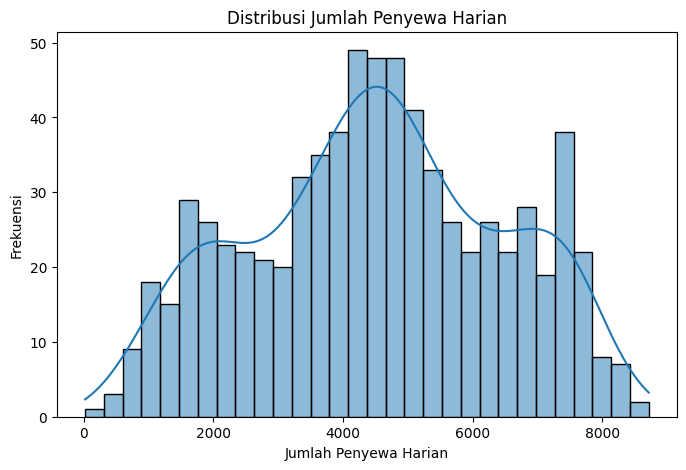

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(day_df["count"], bins=30, kde=True)
plt.xlabel("Jumlah Penyewa Harian")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Penyewa Harian")
plt.show()

##### Berdasarkan distribusi yang ditampilkan, data penyewa harian menunjukkan  bentuk menyerupai distribusi normal tetapi sedikit asimetris. Frekuensi tertinggi terjadi pada kisaran 4000–5000 penyewa per hari, dengan jumlah kemunculan hampir 50 kali, sementara jumlah penyewa harian bervariasi cukup besar dari hari ke hari. Distribusi ini memiliki sedikit skewness ke kanan, yang menunjukkan adanya beberapa hari dengan jumlah penyewa yang lebih tinggi dibandingkan rata-rata.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda berubah sepanjang waktu (tahun dan bulan) ?

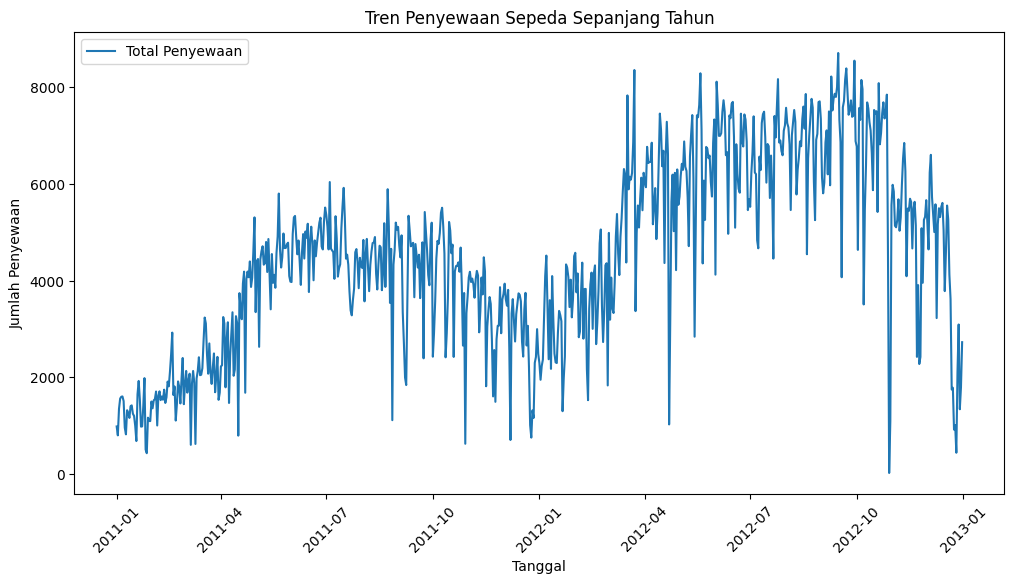

In [40]:
plt.figure(figsize=(12,6))
sns.lineplot(data=day_df, x="date", y="count", label="Total Penyewaan")
plt.title("Tren Penyewaan Sepeda Sepanjang Tahun")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.legend()
plt.show()

#####Secara keseluruhan, jumlah penyewaan sepeda menunjukkan tren meningkat dari awal 2011 hingga pertengahan 2012, sebelum mengalami fluktuasi dan sedikit penurunan di akhir 2012 dan awal 2013. Pola musiman terlihat, dengan penyewaan lebih tinggi di musim panas dan lebih rendah di musim dingin. Fluktuasi harian yang signifikan kemungkinan dipengaruhi oleh cuaca dan perbedaan antara hari kerja dan akhir pekan.

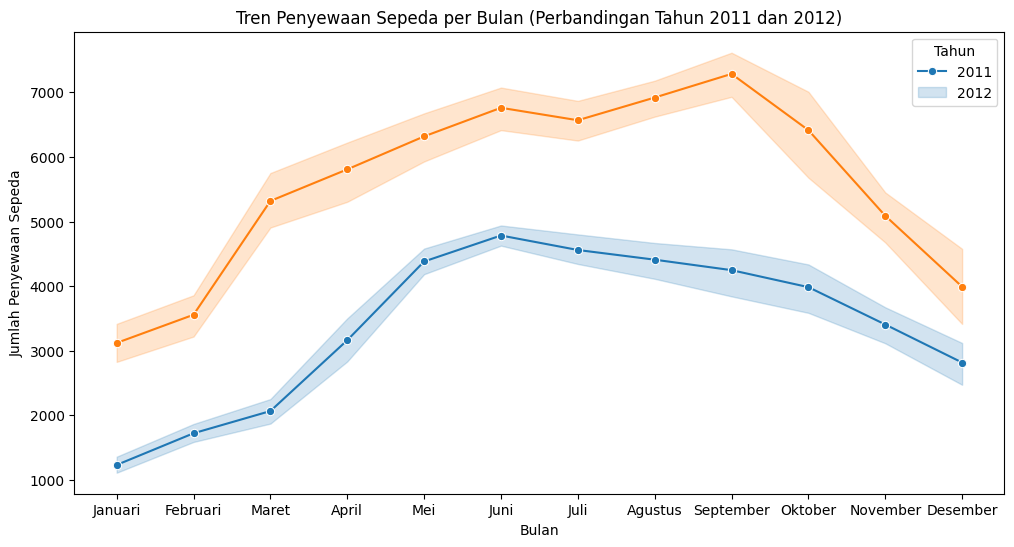

In [41]:
# Plot jumlah penyewaan sepeda sepanjang waktu (tahun dan bulan)
plt.figure(figsize=(12,6))
sns.lineplot(data=day_df, x="month", y="count", hue="year", marker="o")
plt.xticks(ticks=range(1,13), labels=["Januari", "Februari", "Maret", "April", "Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember"])
plt.title("Tren Penyewaan Sepeda per Bulan (Perbandingan Tahun 2011 dan 2012)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.legend(title="Tahun", labels=["2011", "2012"])
plt.show()

Tren penyewaan sepeda menunjukkan pola musiman yang konsisten, dengan peningkatan dari Januari hingga mencapai puncaknya pada bulan Juni–September, lalu menurun kembali hingga Desember. Penyewaan cenderung lebih tinggi selama musim panas dan lebih rendah pada musim dingin, mencerminkan pengaruh cuaca terhadap penggunaan sepeda.

### Pertanyaan 2 : Pada hari apa penyewaan sepeda paling banyak dan paling sedikit, bagaimana perbedaannya antara hari kerja dan akhir pekan?

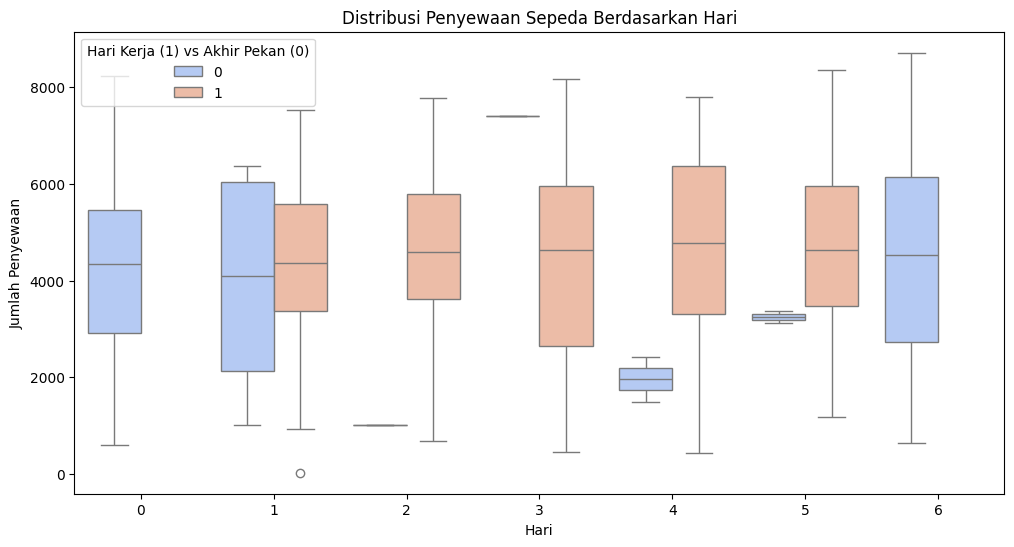

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(data=day_df, x="weekday", y="count", hue="workingday", palette="coolwarm")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Hari Kerja (1) vs Akhir Pekan (0)")
plt.show()

Penyewaan sepeda lebih tinggi pada akhir pekan, kemungkinan karena penggunaan untuk rekreasi, sementara hari kerja tertentu seperti Senin atau Selasa memiliki jumlah penyewaan lebih rendah. Pola ini menunjukkan bahwa aktivitas harian memengaruhi tren penyewaan sepeda.

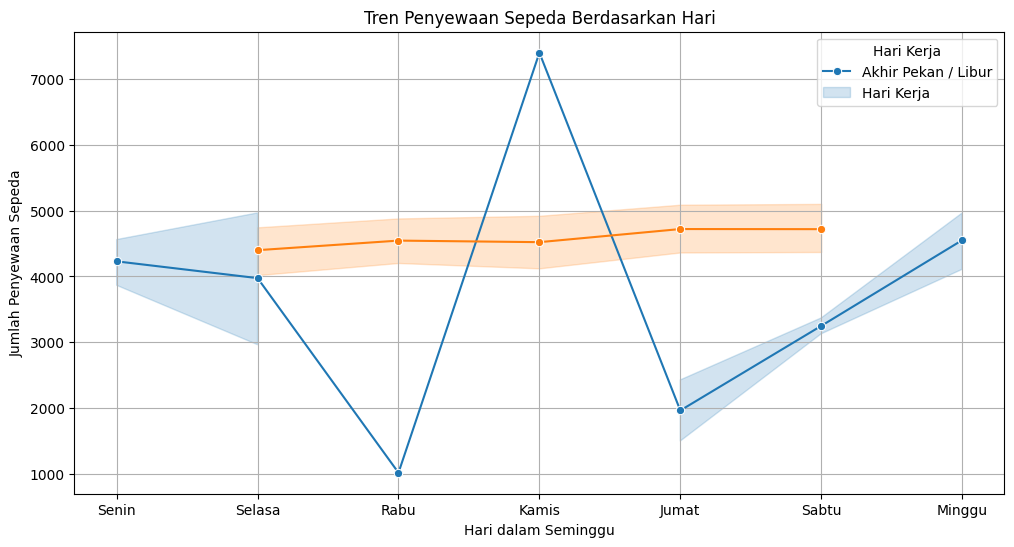

In [43]:
# Plot tren penyewaan per hari
plt.figure(figsize=(12,6))
sns.lineplot(data=day_df, x="weekday", y="count", hue="workingday", marker="o")
plt.title("Tren Penyewaan Sepeda Berdasarkan Hari")
plt.xlabel("Hari dalam Seminggu") # Perbaikan label sumbu x
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.legend(title="Hari Kerja", labels=["Akhir Pekan / Libur", "Hari Kerja"])
plt.xticks(range(0, 7), labels=["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]) # Menambahkan label hari
plt.grid()
plt.show()


Berdasarkan visualisasi, penyewaan sepeda paling banyak terjadi pada hari Kamis dengan lonjakan signifikan, sedangkan hari dengan penyewaan paling sedikit adalah Rabu. Secara umum, penyewaan pada akhir pekan lebih stabil dan cenderung lebih tinggi dibandingkan hari kerja, yang memiliki fluktuasi lebih besar. Tren ini menunjukkan bahwa penggunaan sepeda lebih konsisten untuk rekreasi di akhir pekan, sementara pada hari kerja, faktor lain seperti jadwal kerja atau cuaca mungkin lebih memengaruhi jumlah penyewaan.

### Pertanyaan 3 : Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

<ipython-input-44-f5436b595042>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x="weather_condition", y="count", palette="viridis")


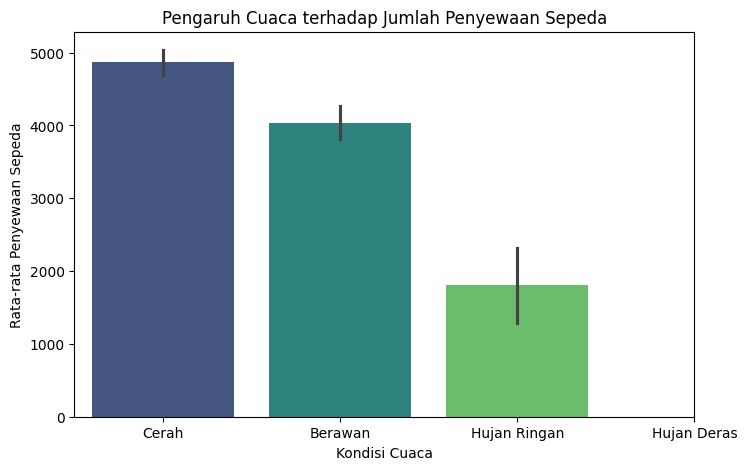

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(data=day_df, x="weather_condition", y="count", palette="viridis")
plt.title("Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Cerah", "Berawan", "Hujan Ringan", "Hujan Deras"])
plt.show()

Kondisi cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda. Penyewaan tertinggi terjadi saat cuaca cerah, diikuti oleh kondisi berawan yang masih cukup tinggi. Jumlah penyewaan menurun drastis saat hujan ringan, dan kemungkinan hampir tidak ada saat hujan deras. Hal ini menunjukkan bahwa pengguna sepeda lebih aktif saat cuaca baik, sementara kondisi hujan mengurangi minat untuk bersepeda secara signifikan.

<ipython-input-45-65f7e2773786>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x="weather_condition", y="count", palette="coolwarm")


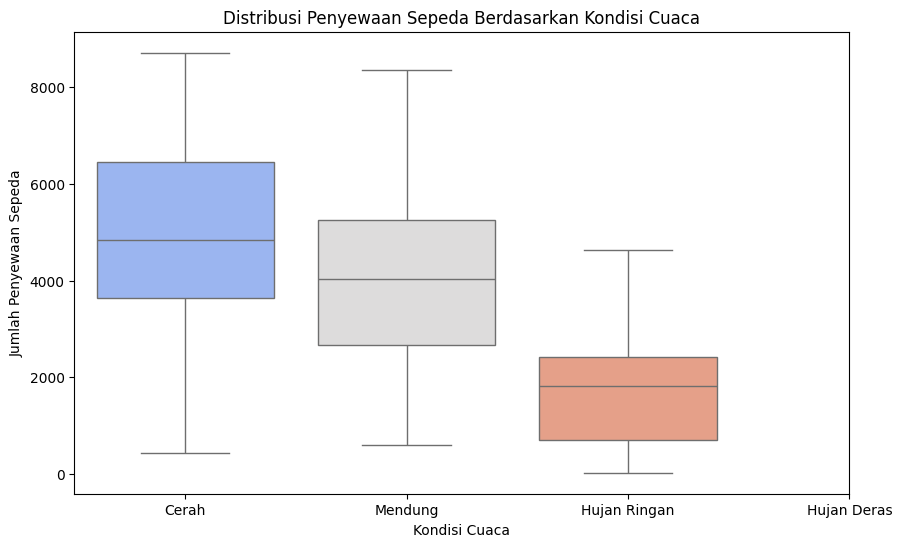

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(data=day_df, x="weather_condition", y="count", palette="coolwarm")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Cerah", "Mendung", "Hujan Ringan", "Hujan Deras"])
plt.show()

Visualisasi menunjukkan bahwa penyewaan sepeda lebih tinggi saat cuaca cerah dan mendung, dengan median penyewaan lebih besar dan variasi yang lebih luas. Sebaliknya, pada kondisi hujan ringan, jumlah penyewaan menurun signifikan, dengan distribusi yang lebih rendah dan lebih sedikit outlier. Tidak ada data penyewaan yang signifikan pada hujan deras, menunjukkan bahwa kondisi cuaca buruk sangat memengaruhi keputusan pengguna untuk menyewa sepeda.

## Analisis Lanjutan (Opsional)

### Menemukan Hubungan antara jumlah penyewaan dengan beberapa faktor yang mungkin mempengaruhi


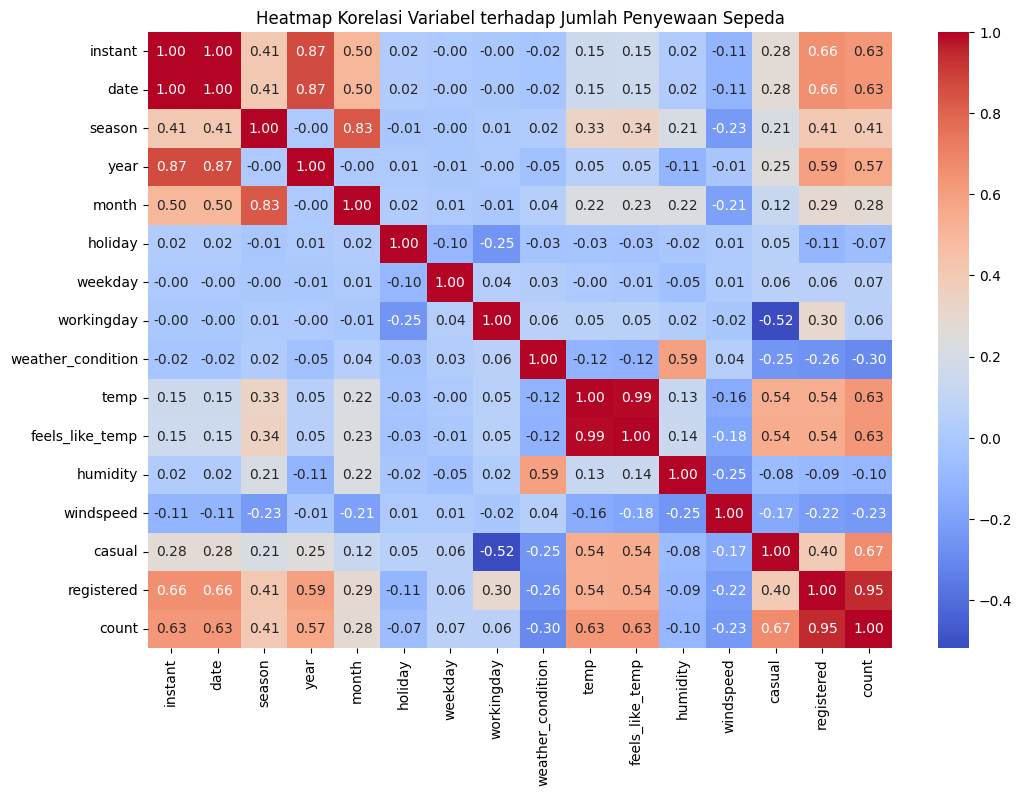

In [46]:
correlation = day_df.drop(columns=['year_month']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel terhadap Jumlah Penyewaan Sepeda")
plt.show()

Jumlah penyewaan sepeda (cnt) memiliki hubungan positif yang kuat dengan jumlah pengguna terdaftar (registered) dan pengguna kasual (casual), menandakan bahwa keduanya berperan besar dalam total penyewaan. Selain itu, faktor musim (season) serta suhu (temp & atemp) juga menunjukkan korelasi positif moderat, yang mengindikasikan bahwa cuaca hangat cenderung meningkatkan jumlah penyewaan. Sebaliknya, kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif, yang berarti kondisi lembab atau berangin dapat menurunkan minat penyewaan. Sementara itu, variabel hari kerja (workingday) dan libur (holiday) tidak memiliki hubungan yang signifikan, menunjukkan bahwa jumlah penyewaan relatif stabil sepanjang minggu.

###  Mengkategorikan penyewa atau pengguna berdasarkan karakteristik tertentu menggunakan metode clustering

<ipython-input-47-61c69f8283d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x="rental_category", palette="pastel")


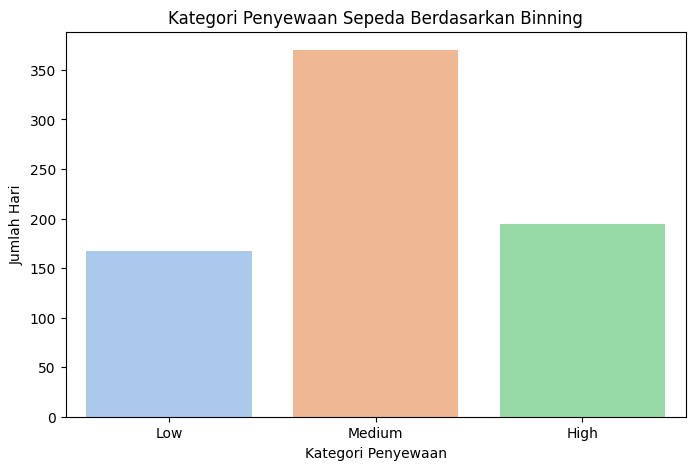

In [47]:
day_df["rental_category"] = pd.cut(day_df["count"], bins=3, labels=["Low", "Medium", "High"])
plt.figure(figsize=(8,5))
sns.countplot(data=day_df, x="rental_category", palette="pastel")
plt.title("Kategori Penyewaan Sepeda Berdasarkan Binning")
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Jumlah Hari")
plt.show()

Sebagian besar hari masuk dalam kategori Medium, artinya jumlah penyewaan sepeda paling sering berada di tingkat menengah. Hari dengan penyewaan rendah lebih banyak dibandingkan hari dengan penyewaan tinggi, tetapi tetap lebih sedikit dibandingkan kategori Medium. Ini menunjukkan bahwa permintaan sepeda umumnya stabil, dengan hanya sedikit hari di mana penyewaan sangat rendah atau sangat tinggi.

## Conclusion

- Conclution pertanyaan 1

Jumlah penyewaan sepeda menunjukkan tren meningkat dari awal 2011 hingga pertengahan 2012, kemudian mengalami fluktuasi dengan sedikit penurunan di akhir 2012. Pola musiman terlihat jelas, di mana penyewaan mencapai puncaknya pada bulan Juni hingga September dan menurun pada musim dingin. Tren ini menunjukkan bahwa faktor musim dan cuaca memiliki pengaruh besar terhadap jumlah penyewaan sepeda, dengan permintaan yang lebih tinggi di musim panas dan lebih rendah di musim dingin.
- Conclution pertanyaan 2

Penyewaan sepeda cenderung lebih tinggi pada akhir pekan dibandingkan hari kerja, menunjukkan pola penggunaan untuk rekreasi. Hari Kamis memiliki lonjakan penyewaan tertinggi, sedangkan Rabu menjadi hari dengan jumlah penyewaan terendah. Fluktuasi lebih besar terjadi pada hari kerja, kemungkinan dipengaruhi oleh jadwal kerja atau cuaca, sementara akhir pekan menunjukkan tren penyewaan yang lebih stabil.
- Conclution pertanyaan 3

Cuaca memiliki dampak besar terhadap jumlah penyewaan sepeda. Penyewaan tertinggi terjadi saat cuaca cerah, masih cukup tinggi saat mendung, tetapi menurun drastis saat hujan ringan dan hampir tidak ada saat hujan deras. Hal ini menunjukkan bahwa pengguna lebih aktif bersepeda dalam kondisi cuaca baik, sementara hujan mengurangi minat penyewaan secara signifikan.